# Lab report coding - Sebastian and Ivar

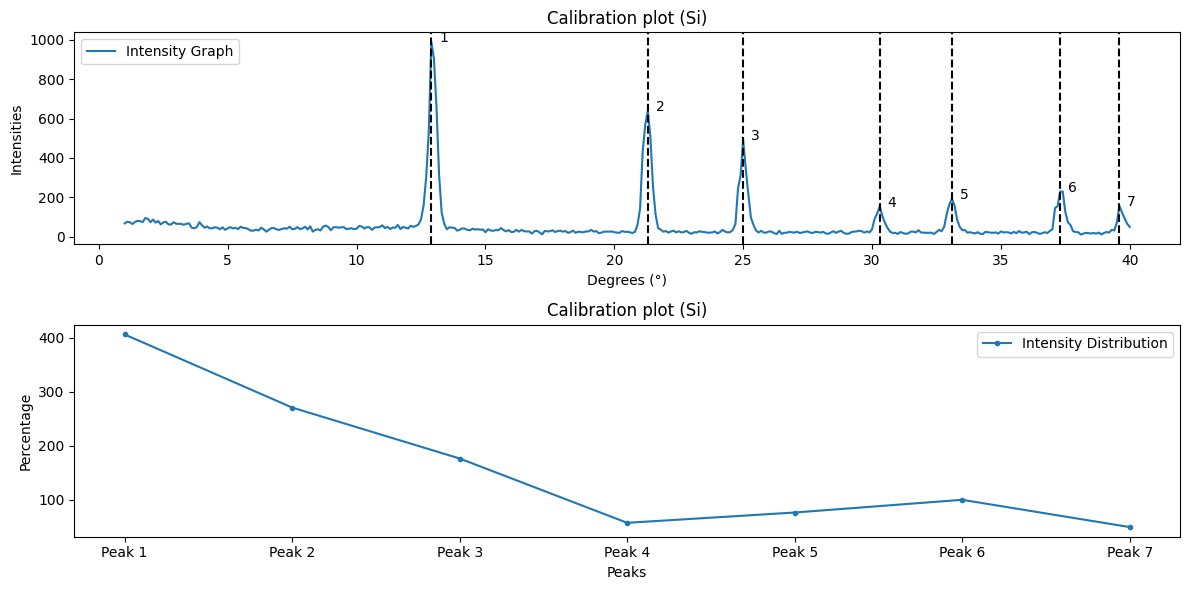

3 First  D-spacings:
 Calibration D-spacings: 
    D-spacing: 3.157043463678615, angle: 12.9, intensity = 100.0
    D-spacing: 1.919007719234797, angle: 21.3, intensity = 66.70772262593914
    D-spacing: 1.6385632627372102, angle: 25.0, intensity = 43.49057765734706
Now finding difference in angle compared to the expected peaks. We need this to see if there is a trend with wrong angles. If there is a consistant shift in the angles from the 'real'/'proper' ones retrieved in webmineral we will shift all values for the unknown sample degrees by a this trend.
  Difference: -0.09999999999999964
  Difference: 0.0
  Difference: 0.10000000000000142


In [5]:
import numpy as np
import matplotlib.pyplot as plt

wavelength = 0.70930

data_calibration = np.genfromtxt("Calibration Si.txt")
data_calibration_degs = data_calibration[0:, 0]
data_calibration_vals = data_calibration[0:, 1]
data_unknown = np.genfromtxt("Unknown sample.txt")
data_unknown_degs = data_unknown[0:, 0]
data_unknown_vals = data_unknown[0:, 1]

# (start, end, peak)
peaks_calibration= [(115, 124, 119), (199, 207, 203), (237, 244, 240), (290, 296, 293), (318, 324, 321), (360, 367, 363), (385, 390, 386)]
peaks_unknown = [(114, 124, 120), (132, 137, 135), (171, 177, 174), (192, 199, 196), (213, 218, 216), (240, 245, 242), (278, 286, 282), (309, 313, 311), (314, 320, 317), (347, 351, 348)  ]


def plot_sample(title, degs, vals, peaks):
  plt.figure(figsize=(12, 3))

  plt.plot(degs, vals, "-", label="Intensity Graph")
  plt.xlabel('Degrees (°)')
  plt.ylabel('Intensities')
  plt.title(title)

  for i, peak in enumerate(peaks):
      xval = degs[peak[2]]
      yval = vals[peak[2]]
      plt.axvline(x=xval, color='black', linestyle='--')
      plt.text(xval + 0.3, yval - 0.5, f'{i+1}', color='black')
  plt.legend()

  # Second subplot: Intensity Distribution
  #plt.subplot(2, 1, 2)
  #plt.xlabel('Peaks')
  #plt.ylabel('Percentage')
  #plt.title(title)

  intensities = np.zeros(len(peaks))
  for i, peak in enumerate(peaks):
      x_section = degs[peak[0]:peak[1] + 1]
      y_section = vals[peak[0]:peak[1] + 1]
      intensities[i] = np.trapz(y_section, x=x_section)
  #plt.plot(intensities, ".-", label="Intensity Distribution")
  #plt.xticks(range(len(peaks)), [f'Peak {i+1}' for i in range(len(peaks))])
  #plt.legend()

  plt.tight_layout()
  plt.show()
  d_spacing = np.zeros(len(peaks)) 
  for i in range(len(peaks)):
    d_spacing[i] = 1 * wavelength / (2 * np.sin(np.deg2rad(degs[peaks[i][2]]) / 2))
  return intensities, d_spacing
intensities_calibration, d_spacing_calibration = plot_sample("Calibration plot (Si)", data_calibration_degs, data_calibration_vals, peaks_calibration)
print("3 First  D-spacings:")
print(" Calibration D-spacings: ")
for i in range(3):
  print(f"    D-spacing: {d_spacing_calibration[i]}, angle: {data_calibration_degs[peaks_calibration[i][2]]}, intensity = {intensities_calibration[i] / intensities_calibration[0] * 100}")
print("Now finding difference in angle compared to the expected peaks. We need this to see if there is a trend with wrong angles. If there is a consistant shift in the angles from the 'real'/'proper' ones retrieved in webmineral we will shift all values for the unknown sample degrees by a this trend.")
expected = [13.00, 21.3, 24.9]
for i in range(3):
  print(f"  Difference: {data_calibration_degs[peaks_calibration[i][2]] - expected[i]}")


Here we can see that there is no consistant shift in the expected angles for sillicon. As such we won't do any such corrections for our unknown sample(s).

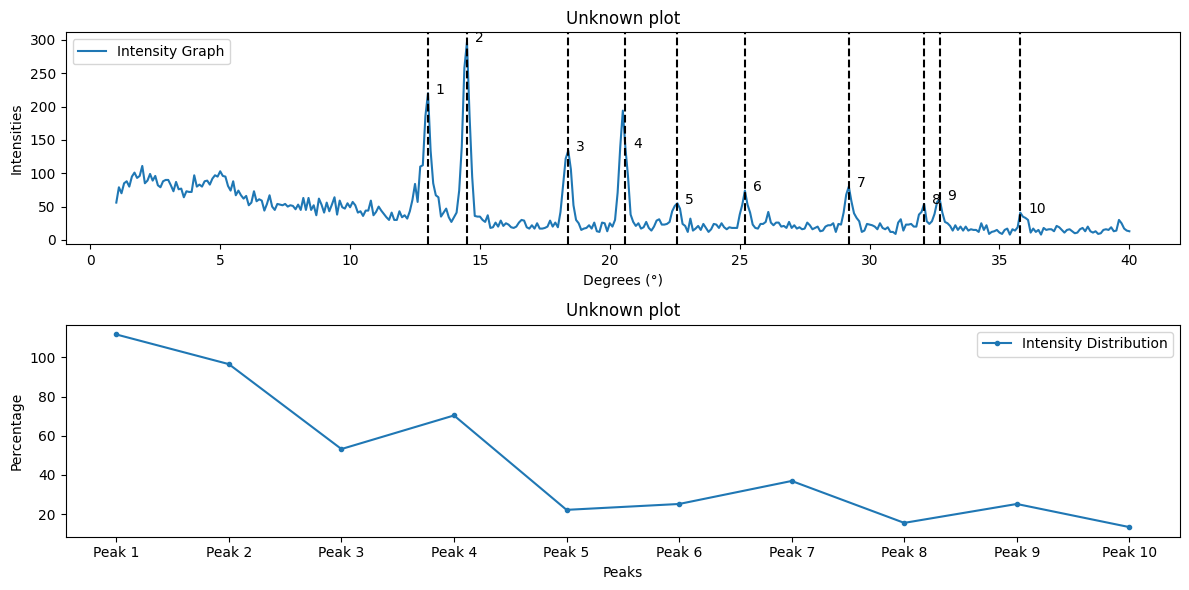

3 First  D-spacings:
 Unknown sample even peak D-spacings: 
    D-spacing: 3.132861587543938, angle: 13.0, intensity = 100.0
    D-spacing: 2.2182096913338856, angle: 18.4, intensity = 47.62757385854965
    D-spacing: 1.809936099385852, angle: 22.6, intensity = 19.82990152193377
 Unknown sample odd peak D-spacings: 
    D-spacing: 2.8102448255206043, angle: 14.5, intensity = 100.0
    D-spacing: 1.9834765456860997, angle: 20.6, intensity = 72.86380113930628
    D-spacing: 1.6257666188947582, angle: 25.2, intensity = 26.04867944070431


In [6]:
intensities_unknown, d_spacing_unknown = plot_sample("Unknown plot", data_unknown_degs, data_unknown_vals, peaks_unknown)

print("3 First  D-spacings:")
print(" Unknown sample even peak D-spacings: ")
for i in range(0, 5, 2):
  print(f"    D-spacing: {d_spacing_unknown[i]}, angle: {data_unknown_degs[peaks_unknown[i][2]]}, intensity = {intensities_unknown[i] / intensities_unknown[0] * 100}")
print(" Unknown sample odd peak D-spacings: ")
for i in range(1, 6, 2):
  print(f"    D-spacing: {d_spacing_unknown[i]}, angle: {data_unknown_degs[peaks_unknown[i][2]]}, intensity = {intensities_unknown[i] / intensities_unknown[1] * 100}")

Firstly looking at the even D-spacing we find up to a tolerance of 0.557% that the mineral corresponding to these peaks should be Sylvite (KCl), otherwise known as potassium salt. The intensities we found are: (100, 48, 20), while the expected ones are (59, 23). As such they correspond to an absolute percentage of about plus minus 11 for the largest difference. No other samples are found up to a tolerance of 1.185%. After this we find "Argentite", then "Quadratite" but potassium salt is alot more likely for such a sample in our lab. You have to jump all the way up to a percentage of 3.45% to find "Carlinite".

https://www.webmineral.com/MySQL/xray.php?lambda=0.7093&lambda1=&ed1=3.132861587543938&ed2=2.2182096913338856&ed3=1.809936099385852&minmax=0.557&chem=&submit=Send+inn


Now looking at the odd D-spacing we find up to a tolerance of 0.531% that the mineral corresponding to these peaks should be Halite (NaCl), otherwise known as salt. The intensities we found are:
(100, 73, 26), while the expected ones are (100, 55, 15). As such they correspond to an absolute percentage of about plus minus 18 for the largest difference. No other samples are found up to a tolerance of 0.833%. After this we find "Hapkeite", then "Quadratite" but normal salt is alot more likely for such a sample in our lab. 

https://www.webmineral.com/MySQL/xray.php?lambda=0.7093&lambda1=&ed1=2.8102448255206043&ed2=1.9739982315393623&ed3=1.6257666188947582&minmax=1.014&chem=&submit=Send+inn